# Performance Measurements

We will be using ROC, SMOTE to evaluate the model using scikit-learn library

## Problem Statement

The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
import seaborn as sns

# Importing Dataset

In [3]:
ad_data = pd.read_csv("Social_Network_Ads.csv")
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Analysis

In [4]:
ad_data.shape

(400, 5)

* ### Checking for Null Values

In [5]:
ad_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

**Inference** - None of the columns contain null values so ther is no need to remove/replace data

* ### Is Data Balanced?

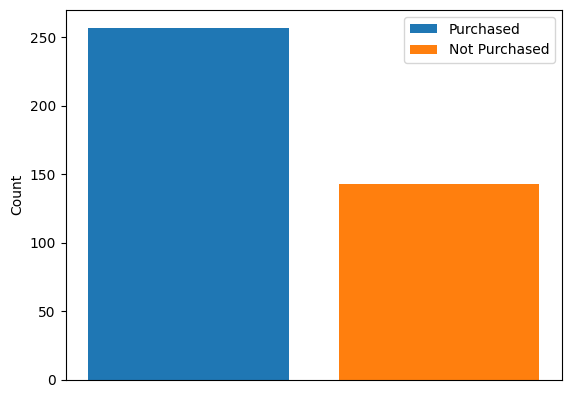

In [10]:
purchased = ad_data[ad_data.Purchased==0].Purchased.count()
not_purchased = ad_data[ad_data.Purchased==1].Purchased.count()
plt.bar(0, purchased, label='Purchased')
plt.bar(1, not_purchased, label='Not Purchased')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

* Dataset is clearly imbalanced

## Splitting Depenedent And Independent Variables

In [11]:
# Eliminating User ID and Gender as they would not have any impact
X = ad_data[['Age', 'EstimatedSalary']]
y = ad_data['Purchased']

In [12]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# SMOTE

In [14]:
# Over sampling the data
smt = SMOTE()
oX_train, oy_train = smt.fit_resample(X_train, y_train)

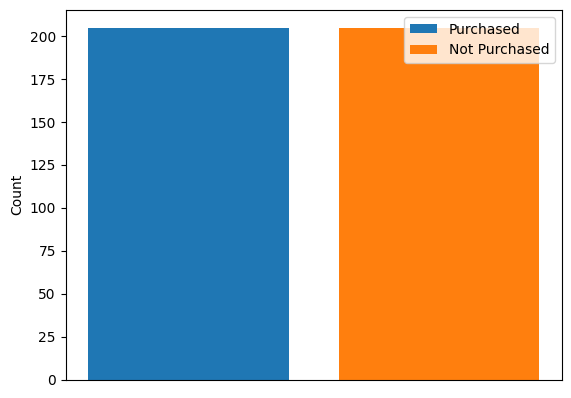

In [15]:
# Checking newly oversmapled data
_, counts = np.unique(oy_train, return_counts=True)

purchased = counts[0]
not_purchased = counts[1]

plt.bar(0, purchased, label='Purchased')
plt.bar(1, not_purchased, label='Not Purchased')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

# Training the model
* ### Logistic Regression

In [16]:
logreg = LogisticRegression(C=1, solver='liblinear', multi_class='ovr')
logreg.fit(oX_train, oy_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

* ### Decision Tree

In [17]:
d_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
d_tree.fit(oX_train, oy_train)

DecisionTreeClassifier(criterion='entropy')

## Confusion Matrix

* ### Logistic Regression

In [18]:
l_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, l_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

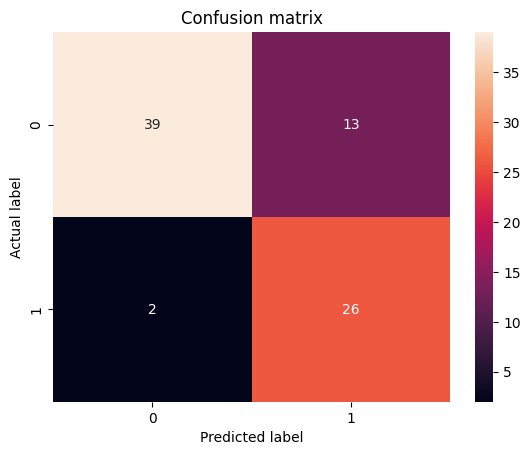

In [19]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("Accuracy: ", metrics.accuracy_score(y_test, l_pred))
print("Precision: ", metrics.precision_score(y_test, l_pred))
print("Recall: ", metrics.recall_score(y_test, l_pred))

Accuracy:  0.8125
Precision:  0.6666666666666666
Recall:  0.9285714285714286


* ### Decision Tree

In [21]:
d_pred = d_tree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, d_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

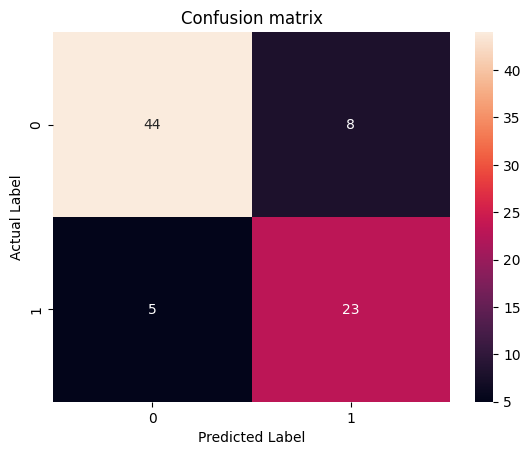

In [22]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.title("Confusion matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [23]:
print("Accuracy: ", metrics.accuracy_score(y_test, d_pred))
print("Precision: ", metrics.precision_score(y_test, d_pred))
print("Recall: ", metrics.recall_score(y_test, d_pred))

Accuracy:  0.8375
Precision:  0.7419354838709677
Recall:  0.8214285714285714


## ROC Curve

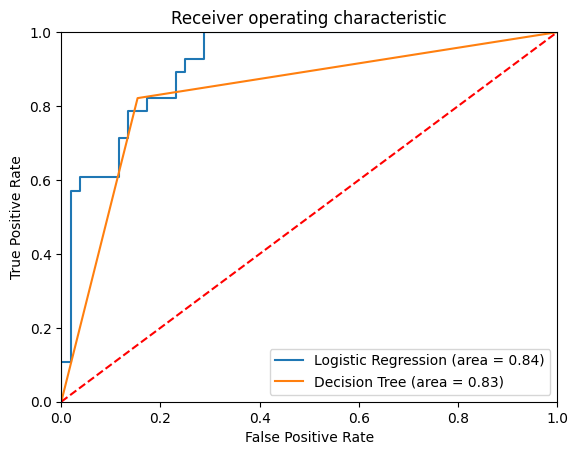

In [24]:
plt.figure()
#For logistic regression
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
lfpr, ltpr, lthresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(lfpr, ltpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#For Decision Tree
decision_roc_auc = metrics.roc_auc_score(y_test, d_tree.predict(X_test))
dfpr, dtpr, lthresholds = metrics.roc_curve(y_test, d_tree.predict_proba(X_test)[:,1])
plt.plot(dfpr, dtpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()